### **Illegal Dumpsites - Daisy:**
For my metric, I looked at a dataset from 2005 that includes data about illegal dump sites in the neighborhoods around the Pittsburgh area. Illegal dump sites can be caused by several things such as laziness, lack of control or regulations, or a shortage of proper waste facilities, which would affect the quality of living in a neighborhood. As a result, these illegal dump sites could lead to pollution in the air, soil, and water as well as bad smells, possible health risks if it contains toxic substances or infected needles, and could lead to diseases as harmful bacteria could grow in the waste. So, if a neighborhood has a large amount of waste and many dumpsites, it would not be considered the best neighborhood to live in. By using the data in this dataset, we determined which neighborhoods in Pittsburgh are the best based on which neighborhoods have the least amount of total estimated tons of trash and the least number of illegal dumping sites. Combining this with the other datasets, we can discover which the best neighborhood in Pittsburgh based on its overall cleaniness and environment. 

In [1]:
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
ds = pd.read_csv("illegaldumpsites.csv")

In [3]:
ds.dropna(subset=['estimated_tons'], inplace = True)
ds['estimated_tons']=pd.to_numeric(ds['estimated_tons'],errors='coerce')

This section of code imports pandas and geopandas, which is used to examine and represent the data. It also reads in the dataset about the illegal dumping sites. Since there were null values in the column containing the data about the estimated tons of trash, I removed those points from the data. In addition, the dataset stored these values as Strings so I convereted them into floats to be able to do calculations, like finding the sum, and also graph the data in different plots.

In [4]:
querymask_ds = ds['City'].str.startswith('Pittsburgh')
pitt = ds[querymask_ds]

This dataset included some data values from areas outside of Pittsburgh like Verona and Monroeville. However, since we are only trying to find the best neighborhood in Pittsburgh, I removed those data points from my dataset so that it would not affect the outcome of our conclusion or skew the data in any way.

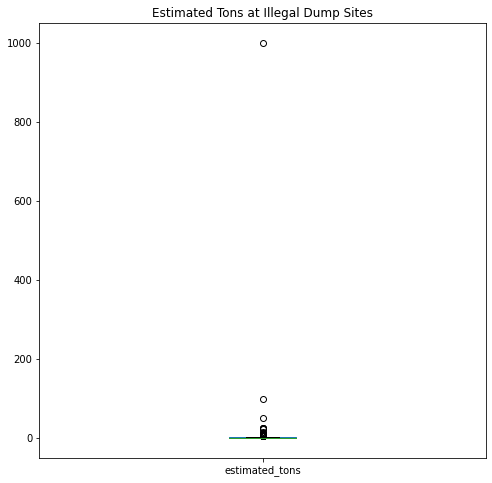

In [5]:
pitt['estimated_tons'].plot.box( title="Estimated Tons at Illegal Dump Sites", figsize =(8,8))

This boxplot is an overview of the dataset after the data points that were not related to the city of Pittsburgh have been removed. Looking at the estimated tons at each dump site, there is a very obvious outlier around 1000 tons and another outlier is around 100 tons. These outliers greatly skew the data to the right and are not representative of the average. They are actually the opposite of what we are looking for in a neighborhood, so I removed these points to make the rest of the data more readable.

In [6]:
filtered_ds = pitt[pitt['estimated_tons']<100]

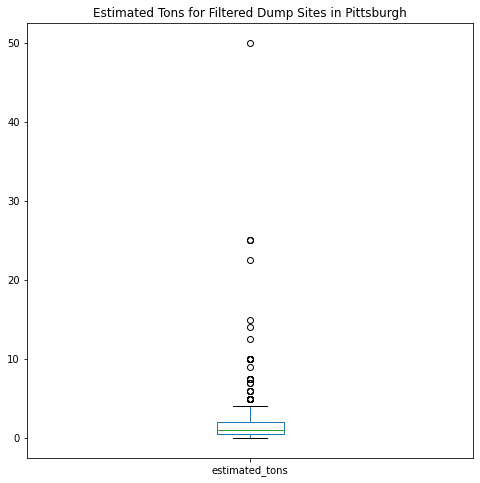

In [7]:
filtered_ds['estimated_tons'].plot.box(title="Estimated Tons for Filtered Dump Sites in Pittsburgh", figsize =(8,8))

After removing the data points with over 100 tons of trash at the site, the boxplot better shows the average amount of trash found at these illegal dump sites. The average is close to around 1.5 tons. There are still some sites with far greater amounts of trash, which we would need to examin further to remove in order to find the best neighborhood in Pittsburgh.

***

In [8]:
total_trash = filtered_ds.groupby("Neighborhood").sum()['estimated_tons']
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") 
dumpsites = neighborhoods.merge(total_trash, how='left', left_on='hood', right_on='Neighborhood')

DriverError: Neighborhoods/Neighborhoods_.shp: No such file or directory

In [ ]:
dumpsites.plot(column='estimated_tons', # set the data to be used for coloring
               cmap='Purples',              # choose a color palette
               edgecolor="grey",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Estimated Tons"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"},
               )
plt.title("Estimated Tons in Each Neighborhood in Pittsburgh")

By taking the sum of the estimated tons of trash at each site in the specific neighborhoods and showing it on the graph, there are a few places that stand out as not the best neighborhoods to live in by my metric. For example, Hazelwood and Carrick are dark purple, indicating that they contain lots of trash. Other places like Perry South and Beltzhoozer also have higher amounts of trash compared to some of the other neighborhoods.

Text(0, 0.5, 'Estimated Tons')

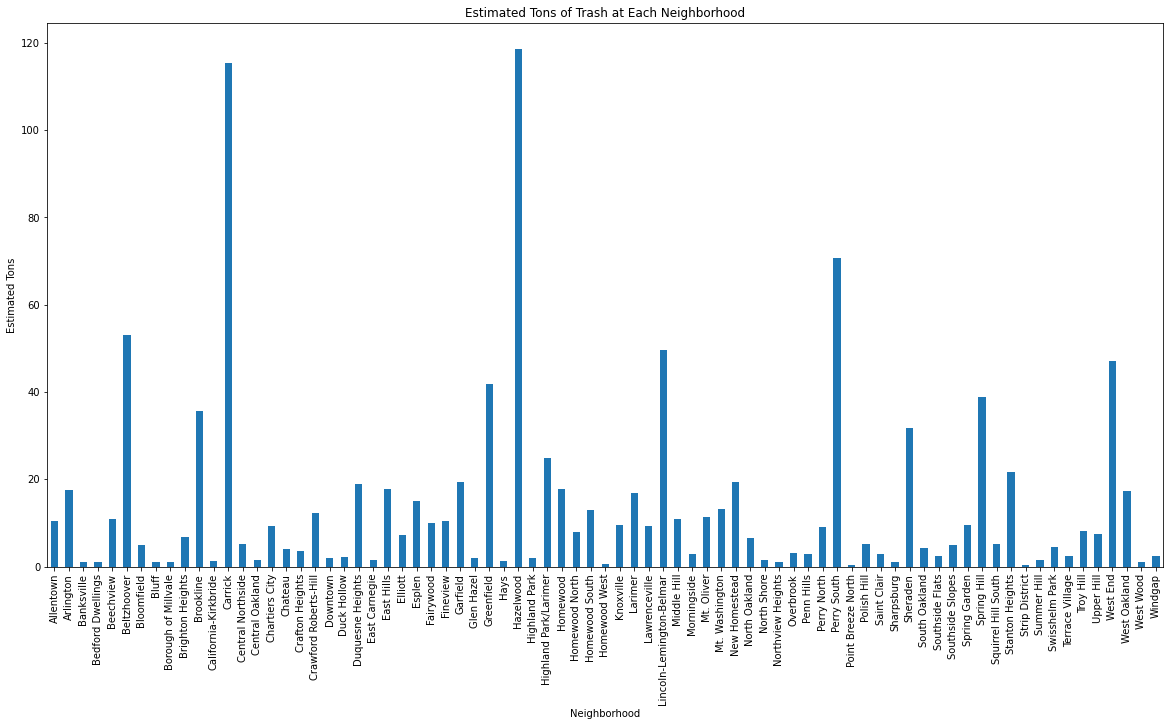

In [9]:
total_trash.plot(kind='bar', rot=90, figsize=(20,10), title = "Estimated Tons of Trash at Each Neighborhood")
plt.ylabel("Estimated Tons")

This is another representation of the previous graph that shows more concrete amount of trash at a given neighborhood. Again Hazelwood and Carrick are the obvious neighborhoods with the most amount of trash. Neighborhoods like Homewood West Point Breeze North, and the Strip District have the least amount of trash.

Text(0, 0.5, 'Number of Dumping Sites')

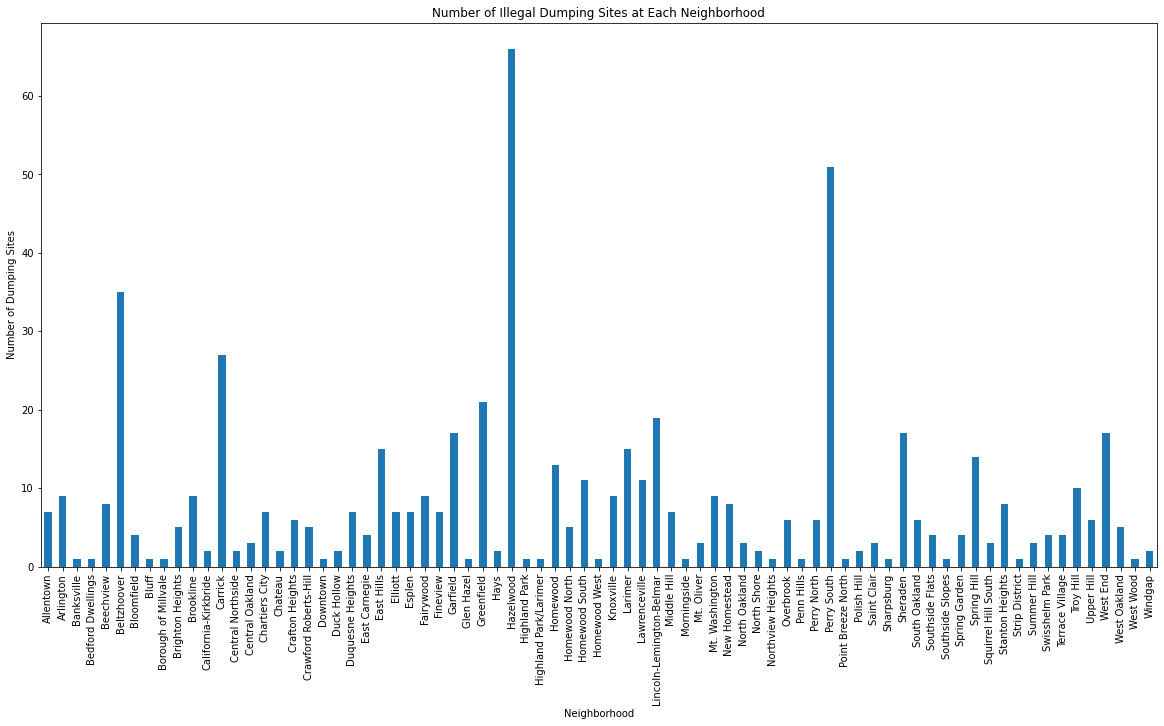

In [10]:
filtered_ds["Neighborhood"].value_counts().sort_index().plot(kind='bar', rot=90, figsize=(20,10), title = "Number of Illegal Dumping Sites at Each Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Number of Dumping Sites")

One thing to consider is that neighborhoods with more illegal dumping sites might have more trash. So this graph shows the total number of illegal dumping sites. As you can see, Hazelwood, Perry South, Beltzhoover, and Carrick also have the most number of dumping sites and places like Point Breeze North and the Strip District have few dump sites. So this could explain why certain neighborhoods have more tons of trash compared to others. 

However, when considering the best neighborhood, I was looking for the neighborhood with the least number of illegal dumping sites as well as the least amount of trash in the area.  

In [11]:
filtered_ds['Neighborhood'].value_counts().sort_values(ascending=True).head(15)
# total number of dumpsites

Bluff                    1
Highland Park/Larimer    1
Morningside              1
Bedford Dwellings        1
Highland Park            1
Homewood West            1
Point Breeze North       1
Strip District           1
West Wood                1
Southside Slopes         1
Banksville               1
Penn Hills               1
Northview Heights        1
Borough of Millvale      1
Sharpsburg               1
Name: Neighborhood, dtype: int64

In [12]:
total_trash.sort_values(ascending=True).head(15)
# total amount of trash in a neighborhood

Neighborhood
Point Breeze North      0.3
Strip District          0.3
Homewood West           0.5
Bedford Dwellings       1.0
West Wood               1.0
Banksville              1.0
Sharpsburg              1.0
Borough of Millvale     1.0
Northview Heights       1.0
Bluff                   1.0
California-Kirkbride    1.3
Hays                    1.3
North Shore             1.5
Central Oakland         1.5
Summer Hill             1.6
Name: estimated_tons, dtype: float64

From these lists, we can narrow down which neighborhood is the best in Pittsburgh. The top list sorts the neighborhoods in ascending order by the number of dumpsites. The second list then outputs the top 15 neighborhoods in PIttsburgh with the least amount of total trash in the area. By comparing the two lists, we can see the neighborhoods with the least amount of trash and the least number of dumpsites, which with my metric means that it would be the best neighborhood to live in. 

### Conclusion:
**Point Breeze North and the Strip District win.**
</br>
After looking at the data, we can see that there are a couple neighborhoods that fit the criteria of being the best neighborhood in Pittsburgh by my metric. Point Breeze North and the Strip District are tied for first because they contain the least amount of trash, with only 0.3 tons, and only one documented dumpsite. Places like Homewood West, Bedford Dwellings, West Wood, and Banksville are runners-up. They only have one dumpsite as well but have slightly more trash in the area compared to Point Breeze North and the Strip District. So, to conclude, Point Breeze North and the Strip District would be the best neighborhood to live in Pittsburgh from just my data because it would be cleaner, could mean that this neighborhood has a better waste management, and better quality of life with less pollution in the area.

In [13]:
neighborhoods = filtered_ds["Neighborhood"].value_counts()
neighborhoods = neighborhoods.astype(float)

count = 0;
for row in filtered_ds["Neighborhood"].value_counts():
    row = row / filtered_ds['Neighborhood'].value_counts().sum() * 1.4
    for r in total_trash:
        r = r / total_trash.sum() * 1.4
        total = row + r
        neighborhoods[count] = total
    count = count + 1